In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv('googleplaystore.csv')
df.dropna(inplace=True)

# Remove rows with non-numeric 'Rating'
df = df[pd.to_numeric(df['Rating'], errors='coerce').notnull()]
df['Rating'] = df['Rating'].astype(float)

# Remove '+' and ',' from 'Installs' and convert to int
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Remove '$' and convert 'Price' to float
df['Price'] = df['Price'].str.replace('$', '').astype(float)


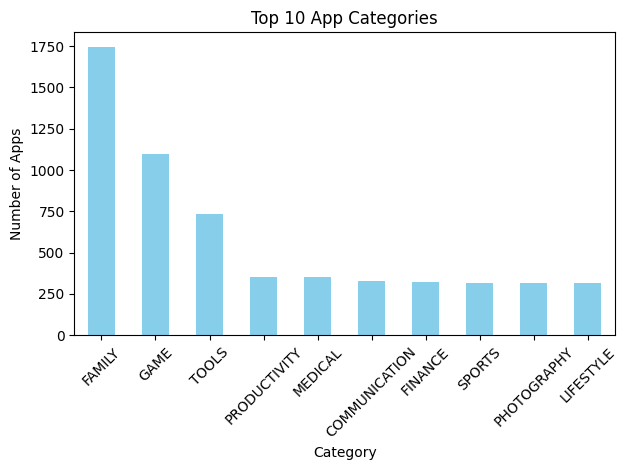

In [3]:
# Most Common App Categories
top_categories = df['Category'].value_counts().head(10)
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

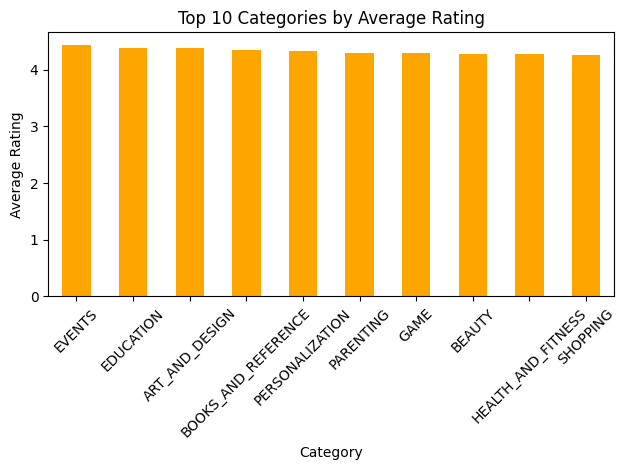

In [4]:
# Average Rating per Category
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
avg_rating.plot(kind='bar', color='orange')
plt.title('Top 10 Categories by Average Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

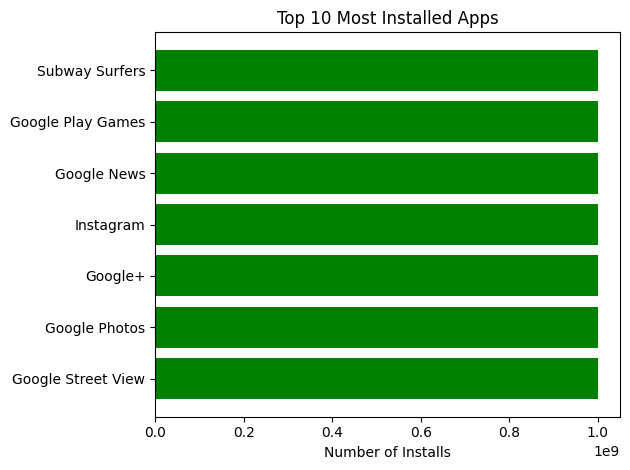

In [5]:
# Top 10 Most Installed Apps
top_installed = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
plt.barh(top_installed['App'], top_installed['Installs'], color='green')
plt.title('Top 10 Most Installed Apps')
plt.xlabel('Number of Installs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

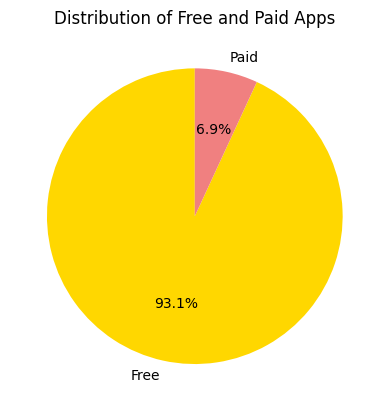

In [6]:
# Free vs Paid Apps Count
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral'])
plt.title('Distribution of Free and Paid Apps')
plt.ylabel('')
plt.show()

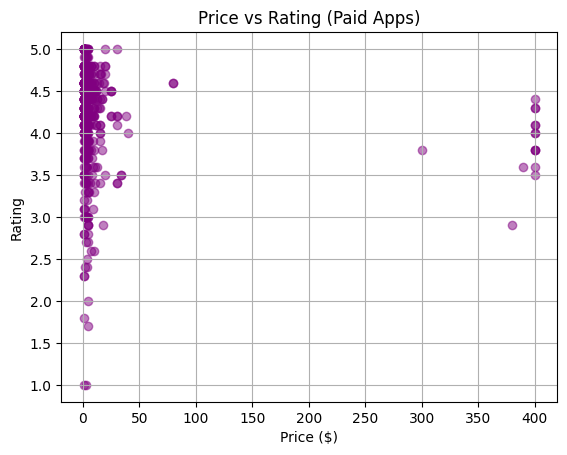

In [7]:
# Relationship Between Price and Rating (Paid Apps Only)
paid_apps = df[df['Type'] == 'Paid']
plt.scatter(paid_apps['Price'], paid_apps['Rating'], alpha=0.5, color='purple')
plt.title('Price vs Rating (Paid Apps)')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

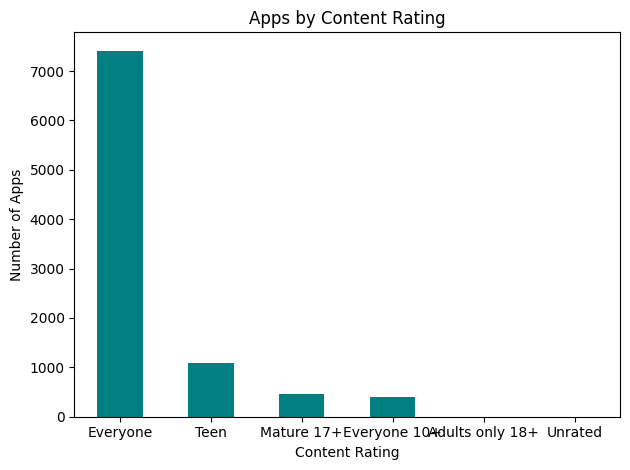

In [8]:
# Apps by Content Rating
df['Content Rating'].value_counts().plot(kind='bar', color='teal')
plt.title('Apps by Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()